# Pytorch Basics
## Section 1 - Scalars , Arrays and Matrix

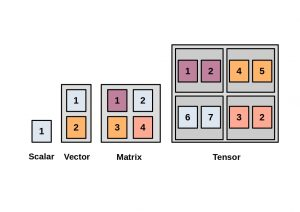

In [ ]:
a = [1,2,3,4] # suppose we have this array

In [2]:
a[2] #accessing using single index

3

In [3]:
 dd = [
[1,2,3],
[4,5,6],
[7,8,9]
] #suppose we have this 2d array

In [4]:
dd[0][2]#accessing using two indices zeroth row second column

3

In [5]:
a = 10 #this is a scalar

# Section 2 - Rank, Axes, And Shape

An "axis" of a tensor is a specific dimension of a tensor. And "rank" refers the number of dimensions or axes of a tensor. The length of each axis tells us how many indexes are available along each axis.

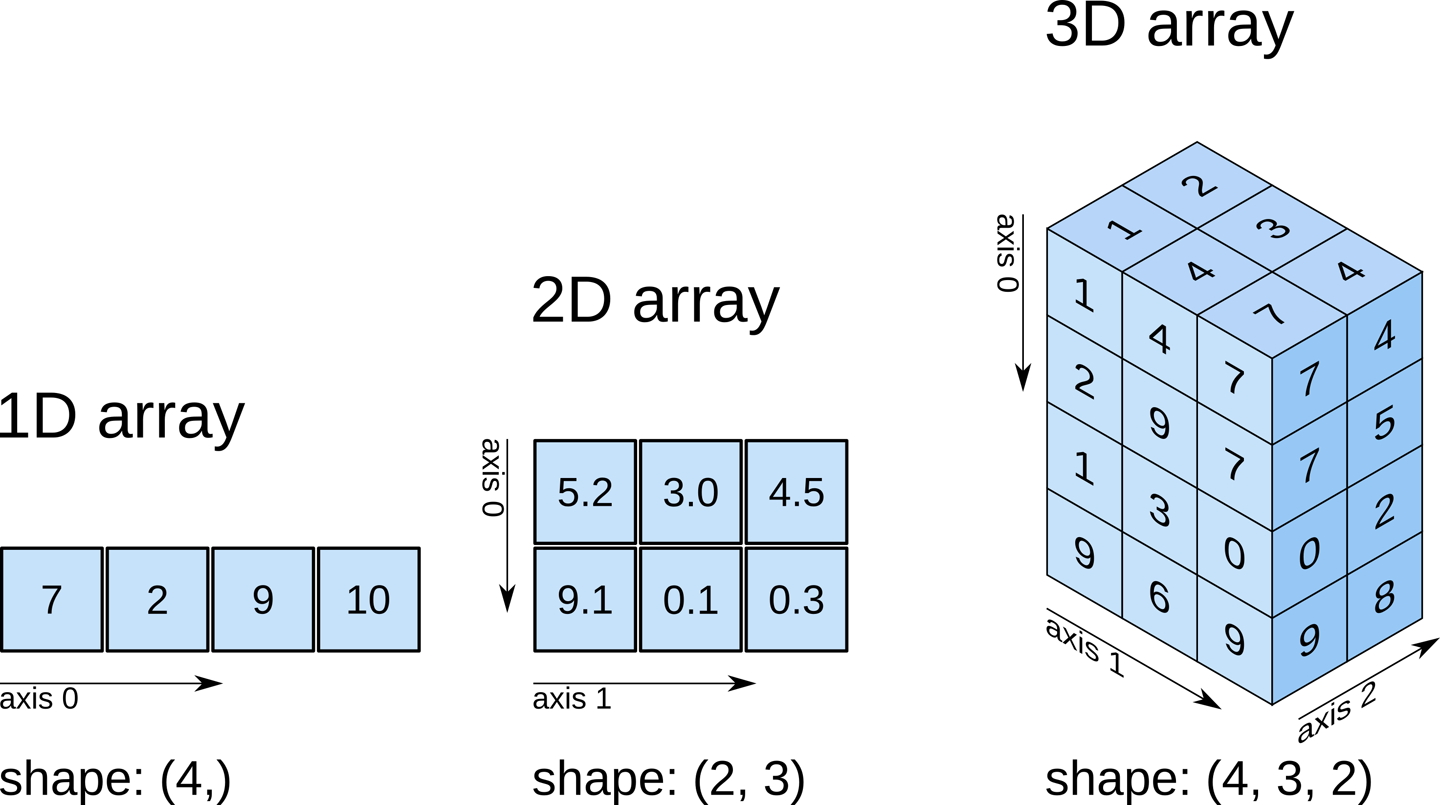

In [6]:
#Accessing elements along the first axis. 
#Each element along the first axis, is an array.

In [7]:
dd[0]

[1, 2, 3]

In [8]:
dd[1]

[4, 5, 6]

In [9]:
dd[2]

[7, 8, 9]

In [10]:
#Accessing elements along the second axis. 
#Each element along the second axis, is a number.

In [11]:
dd[0][0]

1

In [12]:
dd[1][0]

4

In [13]:
dd[2][0]

7

The shape of a tensor is determined by the length of each axis

In [14]:
import torch
t = torch.tensor(dd)#converting the array to a tensor

In [15]:
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [16]:
type(t)

torch.Tensor

In [17]:
#The shape of 3 x 3 tells us that each axis of this rank two tensor has 
#a length of 3 which means that we have three indexes available along each axis.
t.shape

torch.Size([3, 3])

Reshaping changes the shape without changing the underlying data elements.

In [18]:
t.reshape(1,9)# reshaping the tensor to have a shape of (1,9)

tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [19]:
t

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [20]:
t.shape

torch.Size([3, 3])

## Section 3 - Creating Tensors

In [21]:
import numpy as np
data = np.array([1,2,3])#creating numpy array

In [22]:
#creating tensors with data
o1 = torch.Tensor(data)
o2 = torch.tensor(data)
o3 = torch.as_tensor(data)
o4 = torch.from_numpy(data)

In [23]:
#The first output has a datatype of float and the rest are integers
print(o1)
print(o2)
print(o3)
print(o4)
print(o1.dtype)
print(o2.dtype)
print(o3.dtype)
print(o4.dtype)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)
torch.float32
torch.int32
torch.int32
torch.int32


In [24]:
#Creating tensors without data
iden = torch.eye(2)
zero = torch.zeros([2,2])
one = torch.ones([2,2])
random = torch.rand([2,2])

The first option with the uppercase T is the constructor of the torch.Tensor class, and the second option with the lower case t is what we call a factory function that constructs torch.Tensor objects and returns them to the caller.

In [25]:
#orch.Tensor() constructor uses the default dtype when building the tensor.
torch.get_default_dtype()

torch.float32

With torch.Tensor(), we are unable to pass a dtype to the constructor. This is an example of the torch.Tensor() constructor lacking in configuration options. This is one of the reasons to go with the torch.tensor() factory function for creating our tensors.

In [26]:
torch.tensor(data, dtype=torch.float32)
torch.as_tensor(data, dtype=torch.float32)

tensor([1., 2., 3.])

The third difference is lurking behind the scenes or underneath the hood. To reveal the difference, we need to make a change to the original input data in the numpy.ndarray after using the ndarray to create our tensors.

In [27]:
data[0]

1

In [28]:
data[0] = 0 #Modifying the first element
data

array([0, 2, 3])

In [29]:
#Let's see if there is any difference in the creation of tensors after modification
print(o1)
print(o2)
print(o3)
print(o4)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([0, 2, 3], dtype=torch.int32)
tensor([0, 2, 3], dtype=torch.int32)


After setting data[0]=0, we can see some of our tensors have changes. The first two o1 and o2 still have the original value of 1 for index 0, while the second two o3 and o4 have the new value of 0 for index 0.

This happens because torch.Tensor() and torch.tensor() copy their input data while torch.as_tensor() and torch.from_numpy() share their input data in memory with the original input object.

This sharing just means that the actual data in memory exists in a single place. As a result, any changes that occur in the underlying data will be reflected in both objects, the torch.Tensor and the numpy.ndarray.

Sharing data is more efficient and uses less memory than copying data because the data is not written to two locations in memory. This establishes that torch.as_tensor() and torch.from_numpy() both share memory with their input data.

The torch.from_numpy() function only accepts numpy.ndarrays, while the torch.as_tensor() function accepts a wide variety of array-like objects including other PyTorch tensors. For this reason, torch.as_tensor() is the winning choice in the memory sharing game.

In [30]:
#convrting back to numpy.ndarray
print(o3.numpy())
print(o4.numpy())

[0 2 3]
[0 2 3]


The torch.tensor() call is the sort of go-to call, while torch.as_tensor() should be employed when tuning our code for performance.
Some things to keep in mind about memory sharing (it works where it can):

1. Since numpy.ndarray objects are allocated on the CPU, the as_tensor() function must copy the data from the CPU to the GPU when a GPU is being used.
2. The memory sharing of as_tensor() doesn't work with built-in Python data structures like lists.
3. The as_tensor() call requires developer knowledge of the sharing feature. This is necessary so we don't inadvertently make an unwanted change in the underlying data without realizing the change impacts multiple objects.
4. The as_tensor() performance improvement will be greater if there are a lot of back and forth operations between numpy.ndarray objects and tensor objects. However, if there is just a single load operation, there shouldn't be much impact from a performance perspective.

## Section 4 - Tensor Operations

In [31]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32) #Let's create a new tensor

In [32]:
#Let's get the shape of this tensor
t.size()

torch.Size([3, 4])

In [33]:
#Then we can get the rank or the length of the shape of this tensor in three ways
len(t.shape)

2

In [34]:
torch.tensor(t.shape).prod()

tensor(12)

In [35]:
t.numel()

12

**1. Reshaping**

The product of the shape's components has to be equal to the number of elements in the original tensor(12) after the reshaping operation.

In [36]:
t.reshape([1,12])

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [37]:
t.reshape([2,6])

tensor([[1., 1., 1., 1., 2., 2.],
        [2., 2., 3., 3., 3., 3.]])

In [38]:
 t.reshape([3,4])

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [39]:
t.reshape(2,2,3)#Reshaping into three dimensional tensor

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

Reshaping by squeezing and unsqueezing

- Squeezing a tensor removes the dimensions or axes that have a length of one.
- Unsqueezing a tensor adds a dimension with a length of one.

In [40]:
print(t.reshape([1,12]))

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])


In [41]:
print(t.reshape([1,12]).shape)

torch.Size([1, 12])


In [42]:
print(t.reshape([1,12]).squeeze())

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])


In [43]:
print(t.reshape([1,12]).squeeze().shape)

torch.Size([12])


In [44]:
print(t.reshape([1,12]).squeeze().unsqueeze(dim=0))

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])


In [45]:
print(t.reshape([1,12]).squeeze().unsqueeze(dim=0).shape)

torch.Size([1, 12])


**2. Flatten**

Flattening a tensor means to remove all of the dimensions except for one.

In [46]:
#Custom function to flatten a tensor
def flatten(t):
# The -1 tells the reshape() function to figure out what the value should be 
#based on the number of elements contained within the tensor.
    t = t.reshape(1, -1)
    t = t.squeeze()
    return t

Since our tensor t has 12 elements, the reshape() function is able to figure out that a 12 is required for the length of the second axis.

In [47]:
t = torch.ones(4, 3)#Creating a ones tensor with a shape of (4,3) 
t

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [48]:
flatten(t)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [49]:
t.reshape(4,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [50]:
t.flatten()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**3. Concatenate**

In [51]:
t1 = torch.tensor([
    [1,2],
    [3,4]
])
t2 = torch.tensor([
    [5,6],
    [7,8]
])

In [52]:
 torch.cat((t1, t2), dim=0)#concatenating along the first dimension

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])

In [53]:
torch.cat((t1, t2), dim=1)#concatenating along the second dimension

tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]])

**4. Stack**

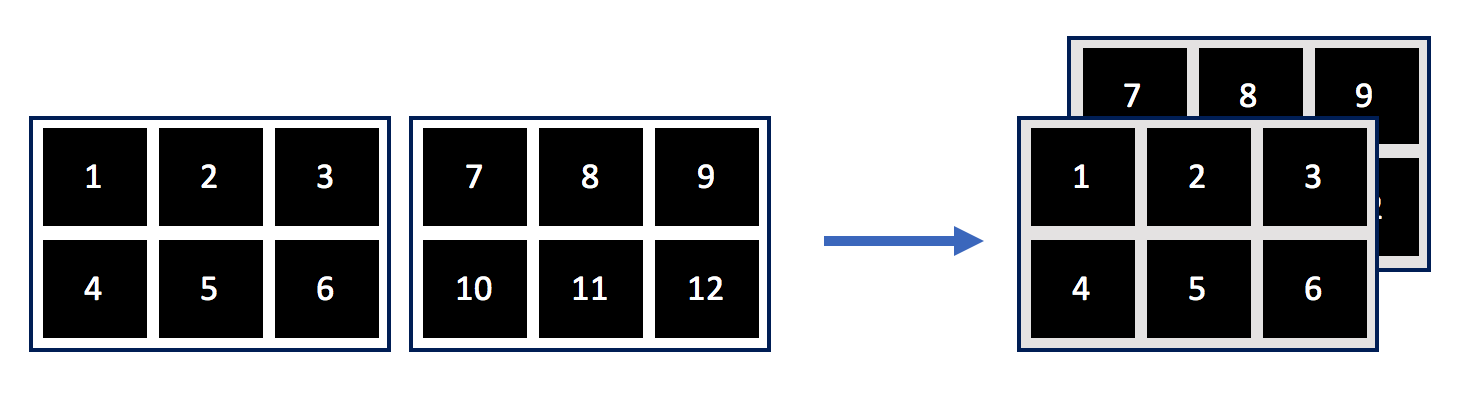

In [54]:
t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]
])

t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3]
])#creating three 4x4 tensors

stack() concatenates our sequence of three tensors along a new axis

In [55]:
t = torch.stack((t1, t2, t3))

Since we have three tensors along a new axis, we know the length of this axis should be 3

In [56]:
t.shape#we can think of the additional axes as the batch number

torch.Size([3, 4, 4])

In [57]:
t = t.reshape(3,1,4,4)#here we add another axes representing the channel

In [58]:
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [59]:
t[0]#accessing the first batch

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]]])

In [60]:
t[0][0]#accessing the first channel

tensor([[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]])

In [61]:
t[0][0][0]#accessing the first row

tensor([1, 1, 1, 1])

In [62]:
t[0][0][0][0]#accessing the first element in the first row

tensor(1)

Flattening Specific Axes Of A Tensor

In [63]:
t.flatten(start_dim=0).shape#flatenning across the first axes

torch.Size([48])

In [64]:
t.flatten(start_dim=0)#this will flatten the whole tensor

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [65]:
t.flatten(start_dim=1).shape#flatenning across the second axes

torch.Size([3, 16])

In [66]:
t.flatten(start_dim=1)#this flatenning preseves the first axes

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

**5.Element wise operations**

An element-wise operation operates on corresponding elements between tensors.

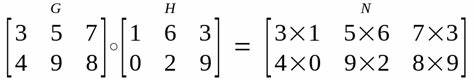

In [67]:
t1 = torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2 = torch.tensor([
    [9,8],
    [7,6]
], dtype=torch.float32)#creating two tensors with the same dimension

In [68]:
t1 + t2 #element wise addition

tensor([[10., 10.],
        [10., 10.]])

In [69]:
t1.add(t2) #another method to add tensors

tensor([[10., 10.],
        [10., 10.]])

In [70]:
t1-t2
t1.sub(t2)#subtracting the two tensors

tensor([[-8., -6.],
        [-4., -2.]])

In [71]:
t1*t2
t1.mul(t2)#multiplying the two tensors

tensor([[ 9., 16.],
        [21., 24.]])

In [72]:
t1/t2
t1.div(t2)#dividing the two tensors

tensor([[0.1111, 0.2500],
        [0.4286, 0.6667]])

**In place operation**

Any function with a trailing underscore represents in place modification of a variable

In [73]:
t1 = torch.ones(2,2)
t2 = torch.ones(2,2)
t1.add_(t2)
t1

tensor([[2., 2.],
        [2., 2.]])

In [74]:
t1 = torch.ones(2,2)
t2 = torch.ones(2,2)
t1.sub_(t2)
t1

tensor([[0., 0.],
        [0., 0.]])

In [75]:
t1 = torch.ones(2,2)
t2 = torch.ones(2,2)
t1.mul_(t2)
t1

tensor([[1., 1.],
        [1., 1.]])

In [76]:
t1 = torch.ones(2,2)
t2 = torch.ones(2,2)
t1.div_(t2)
t1

tensor([[1., 1.],
        [1., 1.]])

**6. Broadcasting**

Broadcasting is the concept whose implementation allows us to add scalars to higher dimensional tensors. The lower dimensional tensor will be broadcasted to the higher dimensional one so that they are of the same shape.

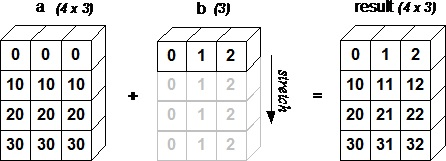

In [77]:
t1 = torch.tensor([
    [1,2],
    [3,4]
], dtype=torch.float32)

t2 = torch.tensor([
    [9,8],
    [7,6]
], dtype=torch.float32)#creating two tensors with the same dimension

In [78]:
t1 + 2 #adding a scalar to the first tensor. This requires broadcasting.

tensor([[3., 4.],
        [5., 6.]])

In [79]:
np.broadcast_to(2, t1.shape)#this shows how the scalar is broadcasted.

array([[2, 2],
       [2, 2]])

In [80]:
t1 + torch.tensor(
    np.broadcast_to(2, t1.shape)
    ,dtype=torch.float32
)#another way to implement the addition of the first tensor to a scalar

tensor([[3., 4.],
        [5., 6.]])

In [81]:
t3 = torch.tensor([2,4], dtype=torch.float32) #creating a tensor with two elements

In [82]:
t1.shape

torch.Size([2, 2])

In [83]:
t3.shape

torch.Size([2])

In [84]:
t1 + t3 # adding the two tensors

tensor([[3., 6.],
        [5., 8.]])

In [85]:
np.broadcast_to(t3.numpy(), t1.shape) # how the second tensor is broadcasted

array([[2., 4.],
       [2., 4.]], dtype=float32)

**7. Element-Wise Comparison Operation** 

In [86]:
 t = torch.tensor([
    [0,5,0],
    [6,0,7],
    [0,8,0]
], dtype=torch.float32)

In [87]:
t==0
t.eq(0)

tensor([[ True, False,  True],
        [False,  True, False],
        [ True, False,  True]])

In [88]:
t >= 0
t.ge(0)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [89]:
t > 0
t.gt(0)

tensor([[False,  True, False],
        [ True, False,  True],
        [False,  True, False]])

In [90]:
t < 0
t.lt(0)

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [91]:
t <= 0
t.le(7)

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [ True, False,  True]])

**8. Element-Wise Operations Using Functions**

In [92]:
t.abs()#absolute value

tensor([[0., 5., 0.],
        [6., 0., 7.],
        [0., 8., 0.]])

In [93]:
t.sqrt()#square root

tensor([[0.0000, 2.2361, 0.0000],
        [2.4495, 0.0000, 2.6458],
        [0.0000, 2.8284, 0.0000]])

In [94]:
t.neg()#negative

tensor([[-0., -5., -0.],
        [-6., -0., -7.],
        [-0., -8., -0.]])

In [95]:
t.neg().abs()

tensor([[0., 5., 0.],
        [6., 0., 7.],
        [0., 8., 0.]])

**9. Reduction Operation** 

Reduction operations in general allow us to compute aggregate (total) values across data structures

In [96]:
 t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
], dtype=torch.float32)# creating a tesnor to perform reduction operation

All of these tensor methods reduce the tensor to a single element scalar valued tensor by operating on all the tensor's elements.

In [97]:
t.sum()

tensor(8.)

In [98]:
t.prod()

tensor(0.)

In [99]:
t.mean()

tensor(0.8889)

In [100]:
t.std()

tensor(1.1667)

We can reduce specific axes at a time.

In [101]:
t.sum(dim=0)#adding elements across the first axis

tensor([2., 4., 2.])

In [102]:
t.sum(dim=1)#adding elements across the second axis

tensor([1., 4., 3.])

**10. Argmax**

Argmax returns the index location of the maximum value inside a tensor.

In [103]:
t = torch.tensor([
    [1,0,0,2],
    [0,3,3,0],
    [4,0,0,5]
], dtype=torch.float32)

In [104]:
t.max()#returns the maximum element

tensor(5.)

In [105]:
t.argmax()#returns the index for the maximum element after flatenning

tensor(11)

We can do this for a sepecific axis.

In [106]:
t.max(dim=0)#Finding the maximum along the first axis

torch.return_types.max(
values=tensor([4., 3., 3., 5.]),
indices=tensor([2, 1, 1, 2]))

In [107]:
t.argmax(dim=0)#Finding the indices of the maximum along the first axis

tensor([2, 1, 1, 2])

In [108]:
t.max(dim=1)#Finding the maximum along the second axis

torch.return_types.max(
values=tensor([2., 3., 5.]),
indices=tensor([3, 1, 3]))

In [109]:
t.argmax(dim=1)#Finding the indices of the maximum along the second axis

tensor([3, 1, 3])

**11. Accessing Elements**

In [110]:
t = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype=torch.float32)

In [111]:
t.mean()#this returns the mean as a tensor object

tensor(5.)

In [112]:
t.mean().item()# actually get the value as a number

5.0

In [113]:
t.mean(dim=0)# this will find the mean along the first axis as a tensor

tensor([4., 5., 6.])

In [114]:
t.mean(dim=0).tolist()#this will convert the tensor to a list

[4.0, 5.0, 6.0]

In [115]:
 t.mean(dim=0).numpy()#this will convert the tensor to a numpy array

array([4., 5., 6.], dtype=float32)

**12. Move to GPU**

In [116]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    x = torch.ones(2, device = device)
    y = torch.ones(2)
    y = y.to(device)
    z = x + y
    z= z.to("cpu")

## Section Five - Gradients

In [117]:
import torch

x = torch.randn(3)
print(x)

tensor([-0.4040, -1.2688, -0.5159])


In [118]:
#Enabling gradient tracking
x = torch.randn(3,requires_grad=True)
print(x)

tensor([-0.2998,  1.1509,  0.2120], requires_grad=True)


Whenever we do this pytorch will create a computational graph and keeps track of the gradients.

In [119]:
y = x + 2

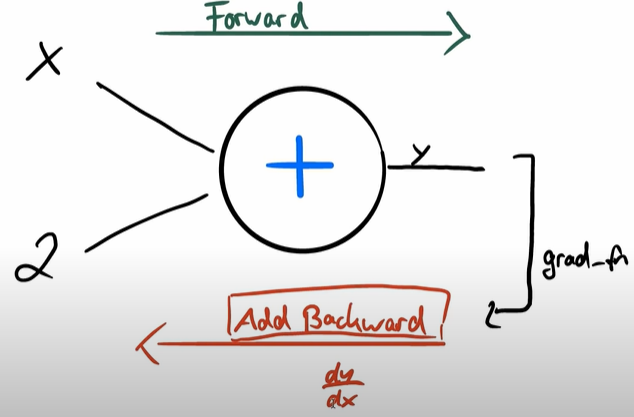

First, we will do a forward pass to calculate y. Since requires_grad is True, y will have an attribute called grad_fn which will be assigned the function AddBackward for addition operation. This will calculate the gradients in the backward pass. This is the derivative of y with respect to x.

In [120]:
print(y)

tensor([1.7002, 3.1509, 2.2120], grad_fn=<AddBackward0>)


In [121]:
#Let's do another operation
z=y*y*2
z=z.mean()#Reduction operation
print(z)

tensor(11.8081, grad_fn=<MeanBackward0>)


Bare in mind that we have not started the computation of gradients. But since requires_grad is enabled for x, pytorch keeps track of the computational graph from z -> y -> x.

In [122]:
#Now let's compute the gradients
z.backward()# dz/dx
print(x.grad)# x has an attribute grad where the gradients are stored

tensor([2.2670, 4.2012, 2.9494])


One thing to note here is that when computing the gradients pytorch is doing a multiplication of a jacobian matrix and a vector. This is also called a chain rule.

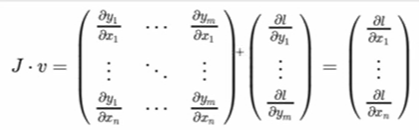

Since z is only one value, we don't need to pass an argument to the backward function to compute the gradients. But if z is not a single value, we must pass a vector to backward function otherwise it will not work.

In [123]:
#Let's use another variable c without computing the mean
c = y*y*2
c

tensor([ 5.7815, 19.8564,  9.7863], grad_fn=<MulBackward0>)

In [124]:
#Since c is not a single value, backward() function wont work
c.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [125]:
#so we need to pass an argument to backward
v=torch.tensor([0.1,1.0,0.001],dtype=torch.float32)
c.backward(v)
print(x.grad)

tensor([ 2.9471, 16.8048,  2.9582])


**Preventing pytorch from tracking gradients**

In [126]:
#x.requires_grad_(False)
#x.detach()
x = torch.randn(3,requires_grad=True)
y=x+2
print(x)
print(y)

tensor([-0.8907,  0.9943, -1.3728], requires_grad=True)
tensor([1.1093, 2.9943, 0.6272], grad_fn=<AddBackward0>)


In [127]:
with torch.no_grad():
    y=x+2
    print(y)

tensor([1.1093, 2.9943, 0.6272])


Calling the backward function will cause the gradients to be accumulated in the grad attribute of x when using multiple iterations.

In [128]:
weights = torch.ones(4,requires_grad=True)
for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [129]:
#Since the gradients are accumulating we have to zero them 
#before the next iteration
weights = torch.ones(4,requires_grad=True)
for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    weights.grad.zero_()#in place modification of weights with zeros

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In the next lesson we will use optimizer to zero the gradients
- optimizer=torch.optim.SGD(weights,lr=0.01)
- optimizer.step()
- optimizer.zero_grad()

## Section Six - Back Propagation

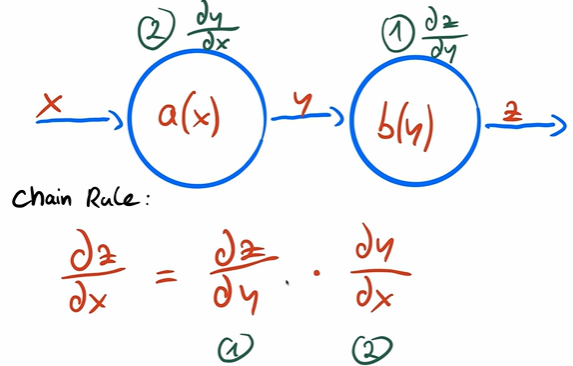

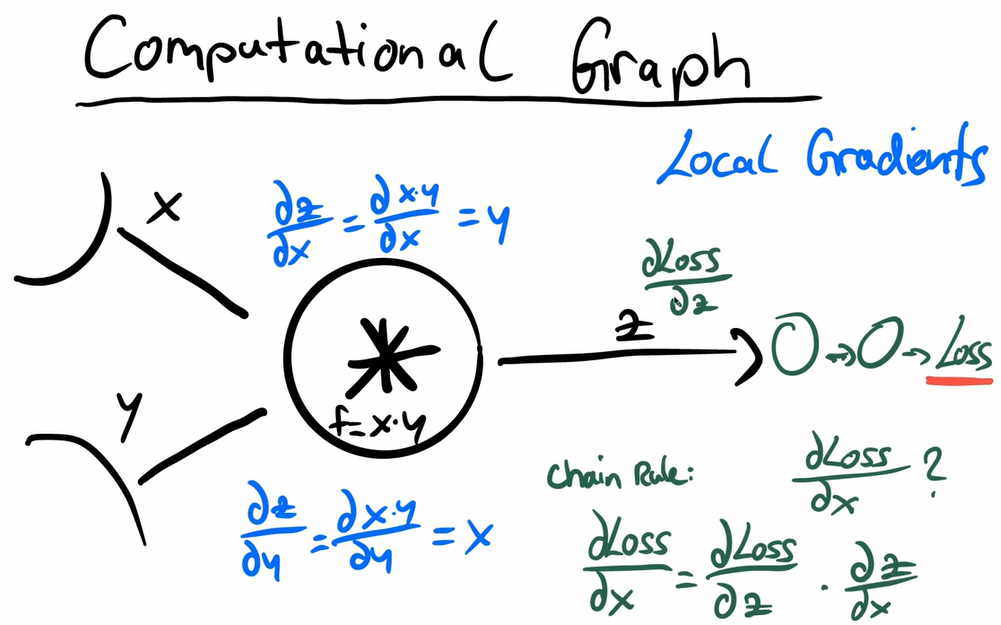

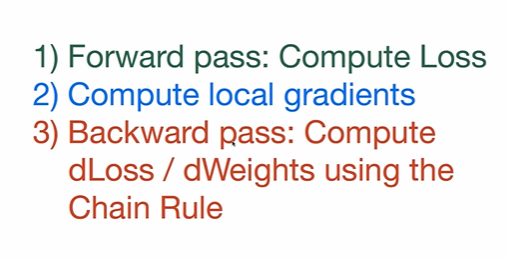

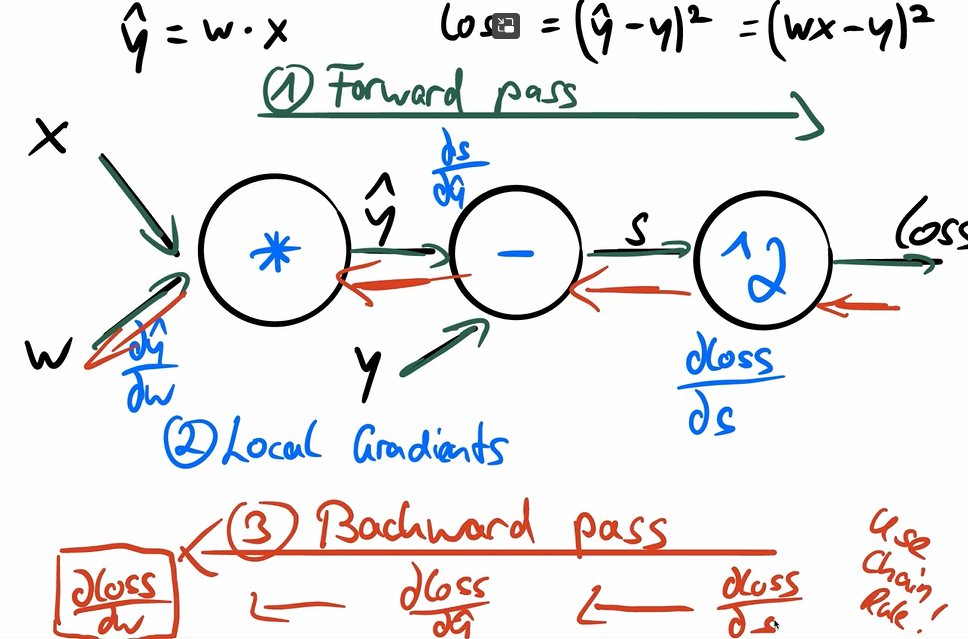

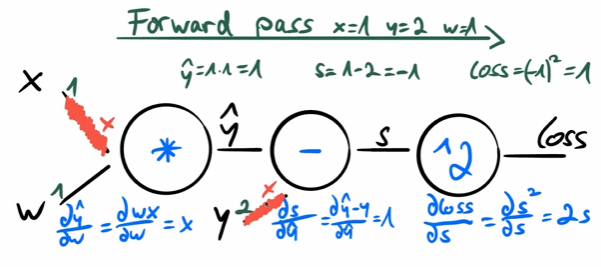

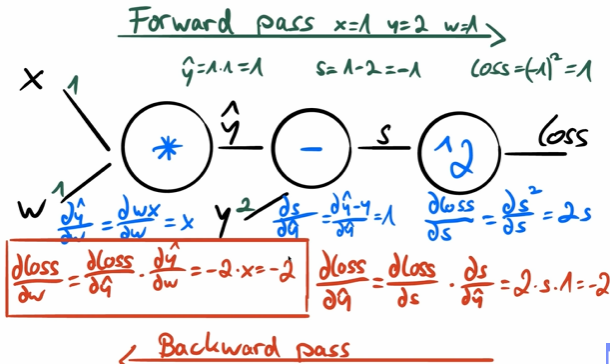

In [130]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0,requires_grad=True)

#forward pass and compute the loss
y_hat = w*x
loss = (y_hat - y)**2
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [131]:
#backward pass
#update weights
# and move forward and backward
loss.backward()
print(w.grad)

tensor(-2.)


## Section Seven - Gradient Descent

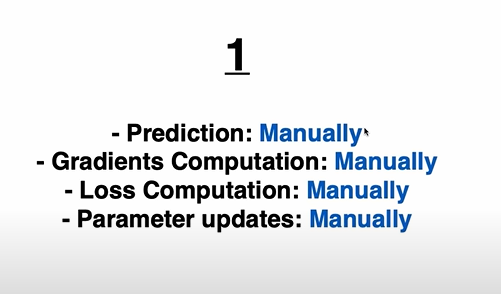

In [132]:
import numpy as np

# f = w * x = 2 * x
x = np.array([1,2,3,4],dtype=np.float32)
y = np.array([2,4,6,8],dtype=np.float32)

#initialize weight
w=0.0

#model prediction
def forward(x):
    return w * x
#MSE loss
def loss(y,y_pred):
    return ((y_pred-y)**2).mean()
    

**Gradient**
- MSE = 1/N * (w*x - y)**2
- dl/dw = 1/N * 2*x * (w*x - y) 

In [133]:
def gradient(x,y,y_pred):
    return np.dot(2*x,y_pred-y).mean()

In [134]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [135]:
#Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(x)
    
    #loss
    l = loss(y,y_pred)
    
    #gradients
    dw = gradient(x,y,y_pred)
    
    #update weights
    w -= learning_rate * dw
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
        

epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314570
epoch 7: w = 1.997, loss = 0.00050332
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206


In [136]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction after training: f(5) = 9.999


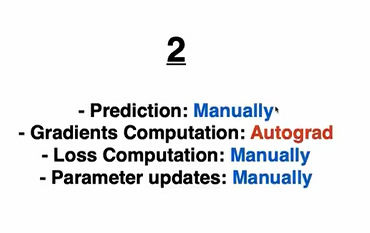

In [137]:
import torch

# f = w * x = 2 * x
x = torch.tensor([1,2,3,4],dtype=torch.float32)
y = torch.tensor([2,4,6,8],dtype=torch.float32)

#initialize weight
w= torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
    return w * x
#MSE loss
def loss(y,y_pred):
    return ((y_pred-y)**2).mean()


In [138]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [139]:
#Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(x)
    
    #loss
    l = loss(y,y_pred)
    
    #gradients
    #dw = gradient(x,y,y_pred)
    l.backward()#dl/dw
    
    
    #update weights
    #This is not part of the gradient computation graph 
    #so we put it under torch.no_grad()
    with torch.no_grad():
        w -= learning_rate * w.grad
    #We need to change the gradients to zero before the next iteration
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000


In [140]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction after training: f(5) = 10.000


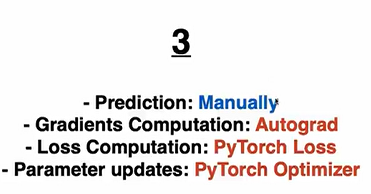

### Training Pipeline

1. Design the model (Input, Output, Forward Pass)
2. Construct loss (MSE) and optimizer (Gradient Decent)
3. Training loop
    - Forward pass: Compute prediction
    - Loss: Using prediction and labels
    - Compute gradients: Bakcward pass
    - Update weights (optimization) 

In [141]:
import torch
import torch.nn as nn

# f = w * x = 2 * x
x = torch.tensor([1,2,3,4],dtype=torch.float32)
y = torch.tensor([2,4,6,8],dtype=torch.float32)

#initialize weight
w= torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

#model prediction
def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5):.3f}')

#MSE loss
# def loss(y,y_pred):
#     return ((y_pred-y)**2).mean()
loss = nn.MSELoss()


#Training
learning_rate = 0.01
n_iters = 100

optimizer = torch.optim.SGD([w],lr=learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = forward(x)
    
    #loss (Still the same)
    l = loss(y,y_pred)
    
    #gradients
    #dw = gradient(x,y,y_pred)
    l.backward()#dl/dw
    
    
    #update weights
    #This is not part of the gradient computation graph 
    #so we put it under torch.no_grad()
    #with torch.no_grad():
        #w -= learning_rate * w.grad
    
    #update weights
    optimizer.step()
    
    #We need to change the gradients to zero before the next iteration
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


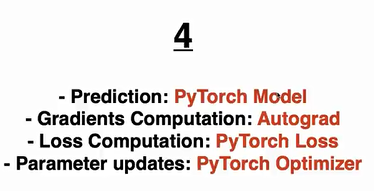

In [142]:
import torch
import torch.nn as nn

# f = w * x = 2 * x
#Modify the shape (n_samples,n_features)
x = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)
y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

x_test = torch.tensor([5],dtype=torch.float32)

#initialize weight
# w= torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
n_samples,n_features = x.shape

In [143]:
x.shape

torch.Size([4, 1])

In [144]:
print(n_samples,n_features)

4 1


In [145]:
#Both our input and output size is 1
input_size = n_features
output_size =n_features

#model prediction
# def forward(x):
#     return w * x

#model prediction
model = nn.Linear(input_size,output_size)       

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

#MSE loss
# def loss(y,y_pred):
#     return ((y_pred-y)**2).mean()
loss = nn.MSELoss()


#Training
learning_rate = 0.01
n_iters = 100

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = model(x)
    
    #loss (Still the same)
    l = loss(y,y_pred)
    
    #gradients
    #dw = gradient(x,y,y_pred)
    l.backward()#dl/dw
    
    
    #update weights
    #This is not part of the gradient computation graph 
    #so we put it under torch.no_grad()
    #with torch.no_grad():
        #w -= learning_rate * w.grad
    
    #update weights
    optimizer.step()
    
    #We need to change the gradients to zero before the next iteration
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')

Prediction before training: f(5) = -3.249
epoch 1: w = -0.266, loss = 52.33116913
epoch 11: w = 1.397, loss = 1.46892667
epoch 21: w = 1.672, loss = 0.14630574
epoch 31: w = 1.723, loss = 0.10578269
epoch 41: w = 1.738, loss = 0.09879749
epoch 51: w = 1.747, loss = 0.09302548
epoch 61: w = 1.754, loss = 0.08761038
epoch 71: w = 1.762, loss = 0.08251093
epoch 81: w = 1.769, loss = 0.07770838
epoch 91: w = 1.776, loss = 0.07318539
Prediction after training: f(5) = 9.550


In [151]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.lin(x)

model = LinearRegression(input_size,output_size) 

In [152]:
#Both our input and output size is 1
input_size = n_features
output_size =n_features

#model prediction
# def forward(x):
#     return w * x

#model prediction
# model = nn.Linear(input_size,output_size)

class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        #define layers
        self.lin = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.lin(x)

model = LinearRegression(input_size,output_size)

print(f'Prediction before training: f(5) = {model(x_test).item():.3f}')

#MSE loss
# def loss(y,y_pred):
#     return ((y_pred-y)**2).mean()
loss = nn.MSELoss()


#Training
learning_rate = 0.01
n_iters = 100

optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

for epoch in range(n_iters):
    #prediction = forward pass
    y_pred = model(x)
    
    #loss (Still the same)
    l = loss(y,y_pred)
    
    #gradients
    #dw = gradient(x,y,y_pred)
    l.backward()#dl/dw
    
    
    #update weights
    #This is not part of the gradient computation graph 
    #so we put it under torch.no_grad()
    #with torch.no_grad():
        #w -= learning_rate * w.grad
    
    #update weights
    optimizer.step()
    
    #We need to change the gradients to zero before the next iteration
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
print(f'Prediction after training: f(5) = {model(x_test).item():.3f}')

Prediction before training: f(5) = -3.888
epoch 1: w = -0.250, loss = 60.75342941
epoch 11: w = 1.539, loss = 1.59193969
epoch 21: w = 1.829, loss = 0.06011984
epoch 31: w = 1.879, loss = 0.01938618
epoch 41: w = 1.890, loss = 0.01729444
epoch 51: w = 1.894, loss = 0.01626290
epoch 61: w = 1.897, loss = 0.01531569
epoch 71: w = 1.900, loss = 0.01442421
epoch 81: w = 1.903, loss = 0.01358465
epoch 91: w = 1.906, loss = 0.01279396
Prediction after training: f(5) = 9.812


## Section 8  - Linear regression

In [153]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 1) Prepare data
x,y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1)

# Converting double to float then to pytorch tensor
x_train = torch.from_numpy(x.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32))

In [154]:
print(x_train)
print(y_train)

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999],
        [ 0.8280],
        [-0.0756],
        [-0.3522],
        [-0.6707],
        [-1.0730],
        [-0.3062],
        [ 2.1856],
        [ 0.8654],
        [ 0.1983],
        [-0.3841],
        [-0.6837],
        [ 0.0508],
        [ 0.5828],
        [ 1.2529],
        [-0.7544],
        [-0.3493],
        [-0.8876],
        [ 0.1866],
        [ 0.8762],
        [ 0.8390],
        [-0.5045],
        [-0.3439],
        [ 1.6925],
        [-2.3015],
        [ 0.9311],
        [ 2.1003],
        [ 1.4621],
        [-0.8452],
        [-0.8779],
        [-0.3224],
        [ 0.8851],
        [ 0.1600],
        [ 1.1316],
        [-0.3753],
        [ 0.5025],
        [-0.2089],
        [ 0.1202],
        [ 0.

In [155]:
# Converting the shape of y
print(y_train.shape)
y_train = y_train.view(y_train.shape[0],1)
print(y_train.shape)

torch.Size([100])
torch.Size([100, 1])


In [156]:
n_samples, n_features  = x_train.shape
print(n_samples,n_features)

100 1


In [157]:
# 2) Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)

In [158]:
# 3) Loss and optimizer
learning_rate = 0.01
mse = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [159]:
# 4) Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    #forward pass and loss
    y_pred = model(x_train)
    
    loss = mse(y_pred,y_train)
    
    #backward pass
    loss.backward()
    
    #update weights
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 ==0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4334.5776
epoch: 20, loss = 3235.7454
epoch: 30, loss = 2440.4580
epoch: 40, loss = 1864.2610
epoch: 50, loss = 1446.3934
epoch: 60, loss = 1143.0778
epoch: 70, loss = 922.7292
epoch: 80, loss = 762.5318
epoch: 90, loss = 645.9836
epoch: 100, loss = 561.1373


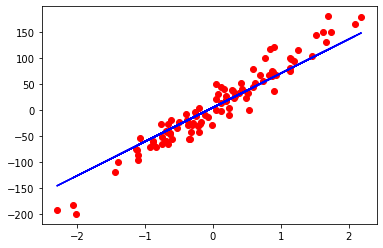

In [160]:
#plot
#we have to detach to stop it being tracked then convert to numpy
predicted = model(x_train).detach().numpy()
plt.plot(x,y,'ro')
plt.plot(x_train,predicted,'b')
plt.show()

## Section 9  - Logistic Regression

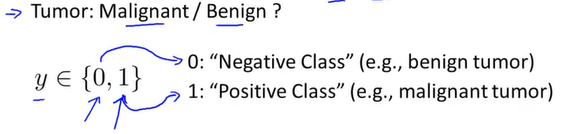

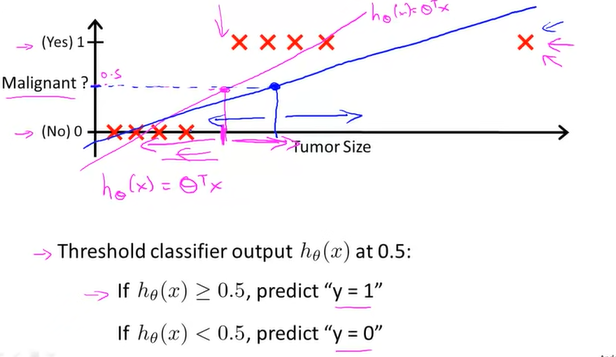

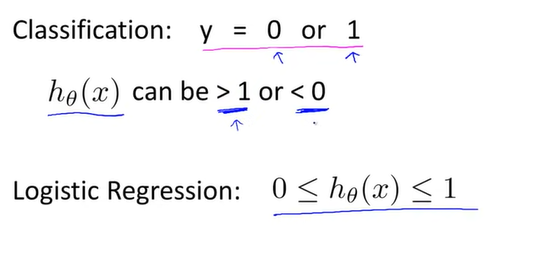

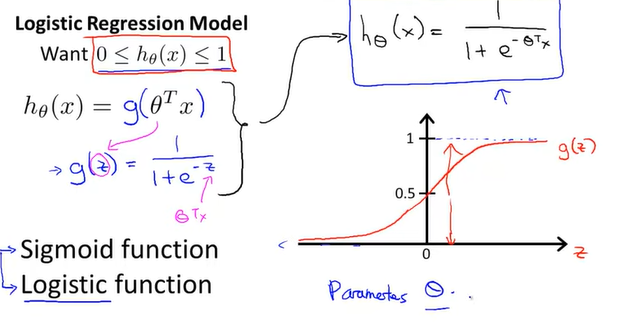

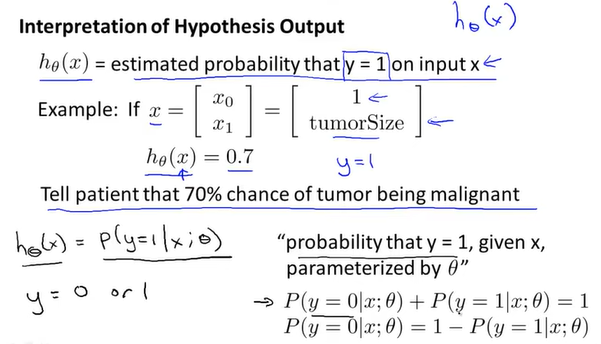

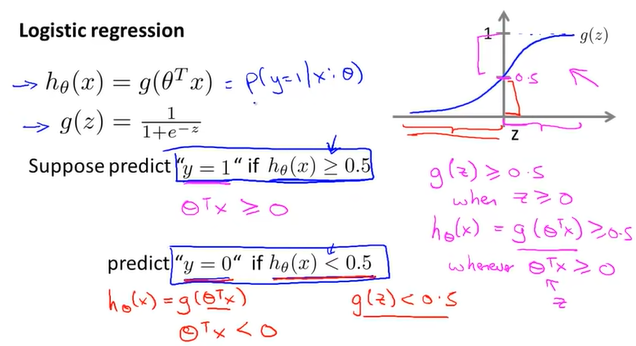

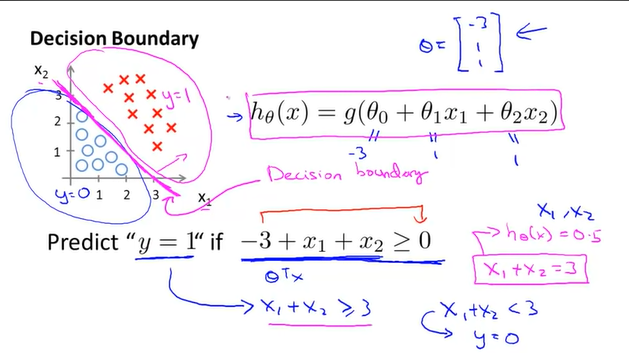

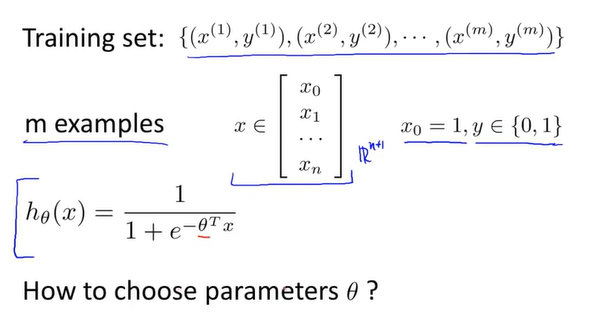

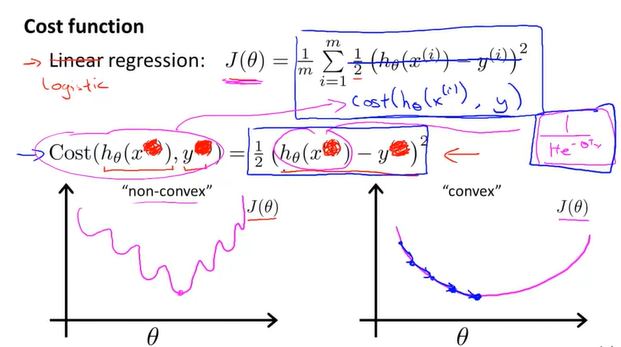

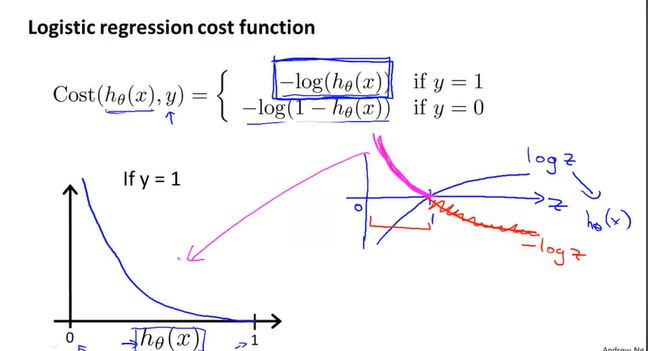

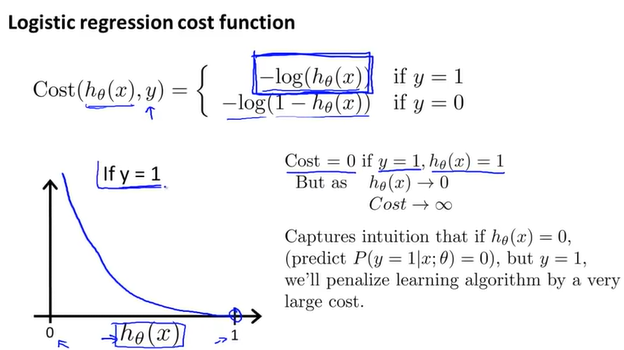

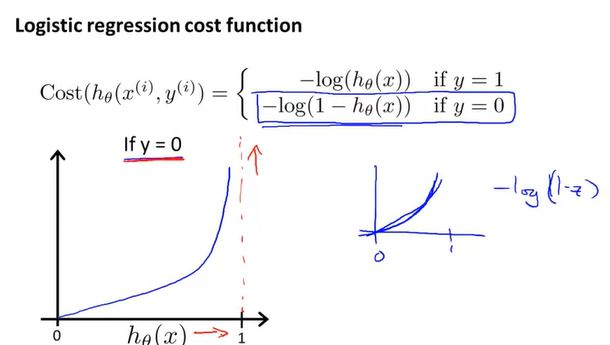

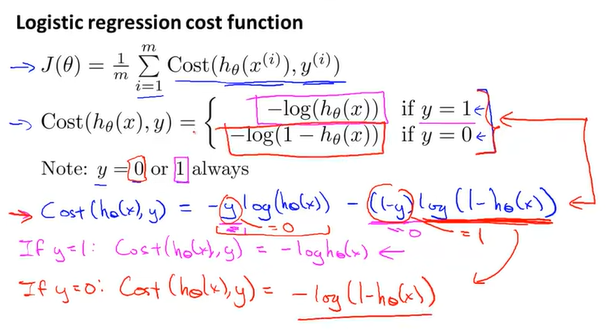

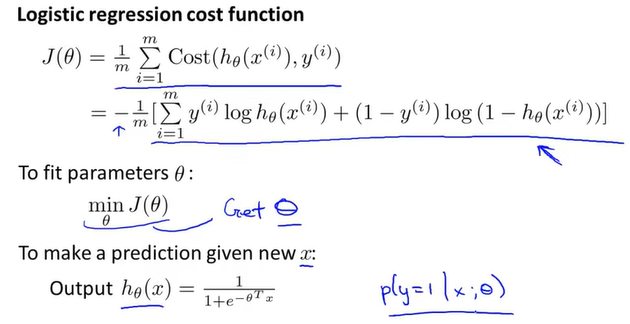

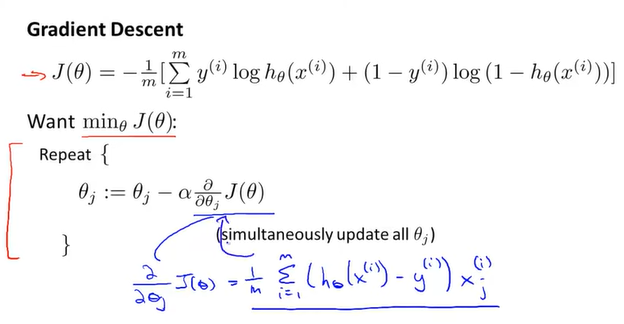

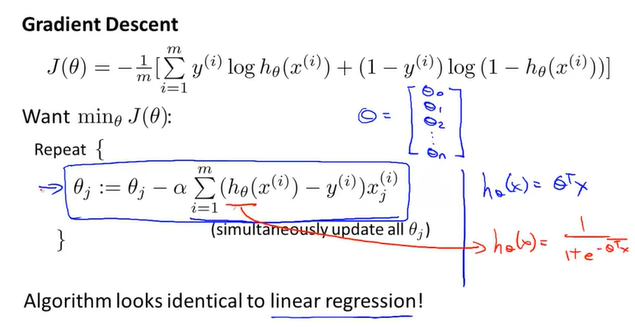

## 9.1 Sigmoid, Binary Cross Entropy vs Softmax, Cross Entropy

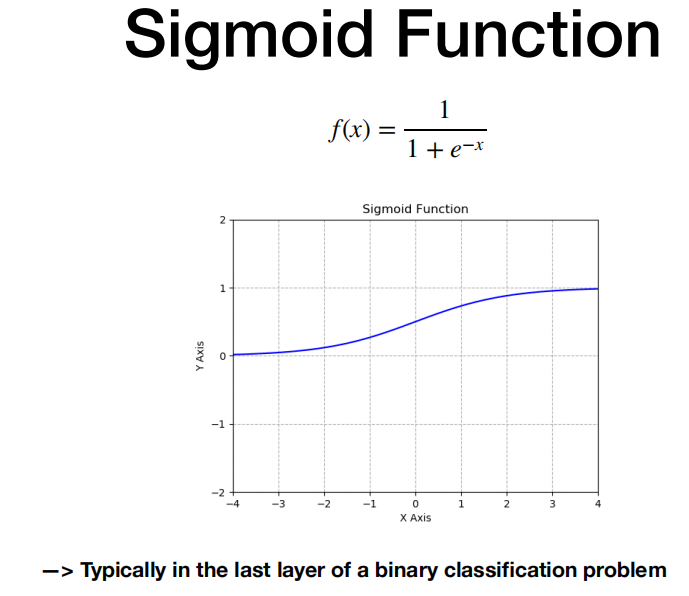

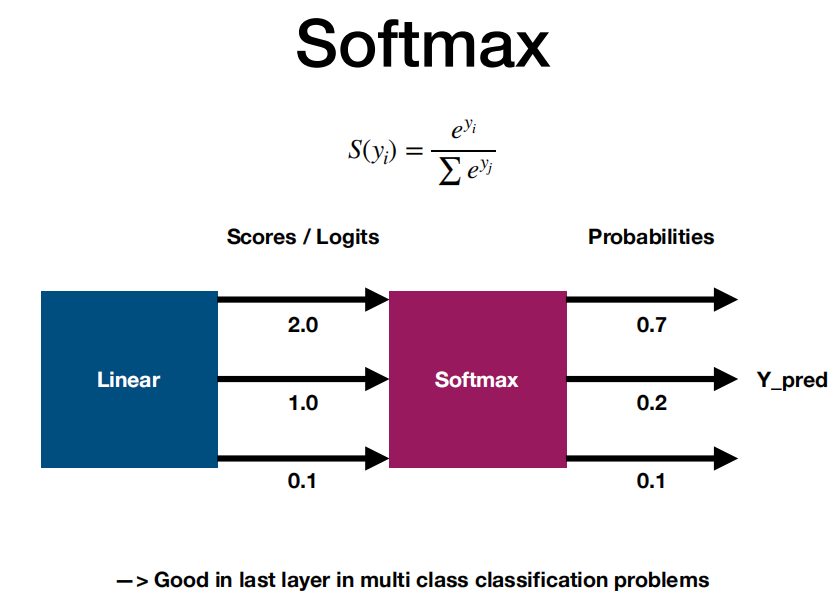

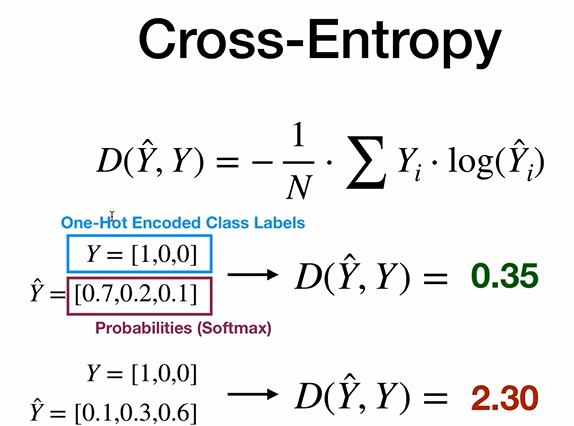

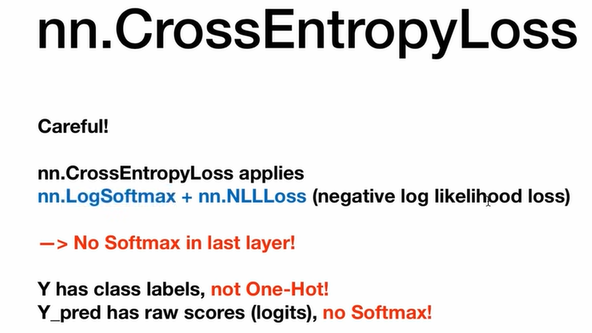

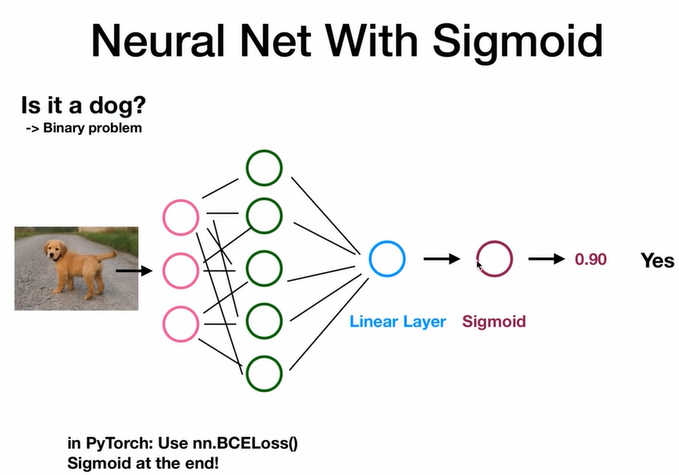

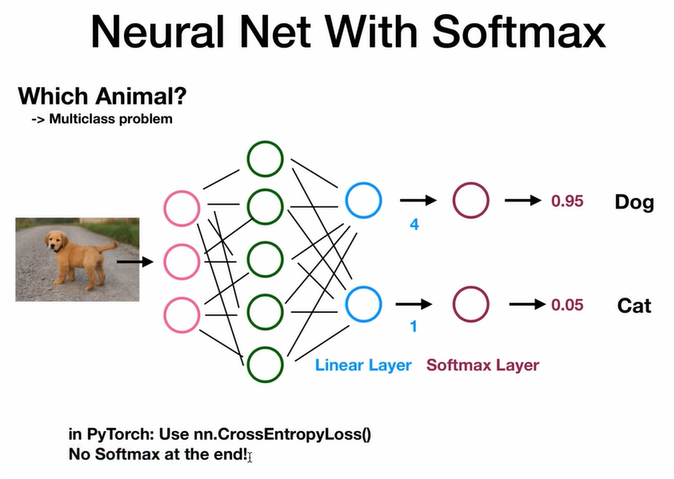

### 9.2 Implementing Softmax using Numpy

In [ ]:
import torch
import torch.nn as nn
import numpy as np

#
#        -> 2.0              -> 0.65  
# Linear -> 1.0  -> Softmax  -> 0.25   -> CrossEntropy(y, y_hat)
#        -> 0.1              -> 0.1                   
#
#     scores(logits)      probabilities
#                           sum = 1.0
#

# Softmax applies the exponential function to each element, and normalizes
# by dividing by the sum of all these exponentials
# -> squashes the output to be between 0 and 1 = probability

# sum of all probabilities is 1
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)

### 9.3 Implementing Cross Entropy using Numpy

In [ ]:
# Cross entropy
# Cross-entropy loss, or log loss, measures the performance of a classification model 
# whose output is a probability value between 0 and 1. 
# -> loss increases as the predicted probability diverges from the actual label
def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

# y must be one hot encoded
# if class 0: [1 0 0]
# if class 1: [0 1 0]
# if class 2: [0 0 1]
Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

### 9.4 Implementing Cross Entropy using Pytorch (n_samples = 1)

In [ ]:
# CrossEntropyLoss in PyTorch (applies Softmax)
# nn.LogSoftmax + nn.NLLLoss
# NLLLoss = negative log likelihood loss
loss = nn.CrossEntropyLoss()
# loss(input, target)

# target is of size nSamples = 1
# each element has class label: 0, 1, or 2
# Y (=target) contains class labels, not one-hot
Y = torch.tensor([0])

# input is of size nSamples x nClasses = 1 x 3
# y_pred (=input) must be raw, unnormalizes scores (logits) for each class, not softmax
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')


### 9.5 Implementing Cross Entropy using Pytorch (n_samples > 1)

In [ ]:
# Allows batch loss for multiple samples

# Target is of size nBatch = 3
# Each element has class label: 0, 1, or 2
Y = torch.tensor([2, 0, 1])

# Input is of size nBatch x nClasses = 3 x 3
# Y_pred are logits (not softmax)
Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9], # predict class 2
    [1.2, 0.1, 0.3], # predict class 0
    [0.3, 2.2, 0.2]]) # predict class 1

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

# get predictions
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')

### 9.6 Binary classification

In [ ]:
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

### 9.7 Multiclass problem

In [ ]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

### Logistic Regression

In [16]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Preparing classification dataset
bc = datasets.load_breast_cancer()

X,y = bc.data, bc.target

print(X.shape,y.shape)

(569, 30) (569,)


In [3]:
print('x:', X[0],'y:',y[0])

x: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] y: 0


In [4]:
n_samples, n_features = X.shape
print(n_samples,n_features)

569 30


In [5]:
# train-test split
X_train, X_test, y_train,  y_test = train_test_split(X , y, test_size = 0.2, random_state = 1234)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [6]:
# Normalizing the training data and fitting the test data using the precomputed mean and std
print('Before normalization x:', X_train[0],'y:',y_train[0])
print('X_train max: ', X_train.max())
print('X_train min: ', X_train.min())

Before normalization x: [1.288e+01 1.822e+01 8.445e+01 4.931e+02 1.218e-01 1.661e-01 4.825e-02
 5.303e-02 1.709e-01 7.253e-02 4.426e-01 1.169e+00 3.176e+00 3.437e+01
 5.273e-03 2.329e-02 1.405e-02 1.244e-02 1.816e-02 3.299e-03 1.505e+01
 2.437e+01 9.931e+01 6.747e+02 1.456e-01 2.961e-01 1.246e-01 1.096e-01
 2.582e-01 8.893e-02] y: 1
X_train max:  3432.0
X_train min:  0.0


In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('After Normalization x:', X_train[0],'y:',y_train[0])
print('X_train max: ', X_train.max())
print('X_train min: ', X_train.min())

After Normalization x: [-0.36180827 -0.26521011 -0.31715702 -0.46713841  1.80382609  1.18174184
 -0.51689239  0.10653677 -0.39005152  1.39140136  0.14370971 -0.12075458
  0.16013008 -0.13255126 -0.58631633 -0.12476339 -0.57865272  0.10906824
 -0.28187354 -0.1889237  -0.25710149 -0.24033176 -0.2441722  -0.36688232
  0.5448709   0.24812607 -0.71088618 -0.07967528 -0.52798733  0.2506337 ] y: 1
X_train max:  11.51845624444199
X_train min:  -3.124497951152048


In [8]:
#Converting from numpy array to a tensor
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [9]:
#Reshaping the label from (455,) to (455,1)
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)
print(y_train.shape)
print(y_test.shape)

torch.Size([455, 1])
torch.Size([114, 1])


In [10]:
# Creating Logistic Regression Model
# y = sigmoid (wx+b)
class LogisticRegression(nn.Module):
    def __init__(self,n_input_features):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(n_input_features,1)
    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
model = LogisticRegression(n_features)

In [11]:
# Loss and Optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [12]:
# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    y_pred = model(X_train)
    
    loss = criterion(y_pred,y_train)
    
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 ==0:
        print(f'epoch {epoch+1}: loss = {loss.item():.4f}')

epoch 10: loss = 0.5638
epoch 20: loss = 0.4740
epoch 30: loss = 0.4142
epoch 40: loss = 0.3714
epoch 50: loss = 0.3392
epoch 60: loss = 0.3139
epoch 70: loss = 0.2934
epoch 80: loss = 0.2764
epoch 90: loss = 0.2620
epoch 100: loss = 0.2497


In [14]:
# Evaluation
with torch.no_grad():
    y_pred = model(X_test)
    print('Before Rounding:',y_pred[0])
    y_pred_cls = y_pred.round() # Rounding the results to 0 and 1
    print('After Rounding:',y_pred_cls[0])
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

Before Rounding: tensor([0.7896])
After Rounding: tensor([1.])
accuracy = 0.8860


In [24]:
import numpy as np
import torch.nn as nn
import torch
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size = 0.2, random_state = 1234)

n_samples, n_features = X_train.shape

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

class LogisticRegression(nn.Module):
    def __init__(self,n_input_features):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(n_input_features,1)
    def forward(self,x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression(n_features)

learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

n_epochs = 100

for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: loss = {loss.item():.4f}')

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_cls = y_pred.round()
    acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'Accuracy = {acc:.4f}')

epoch 10: loss = 0.6671
epoch 20: loss = 0.5348
epoch 30: loss = 0.4547
epoch 40: loss = 0.4012
epoch 50: loss = 0.3626
epoch 60: loss = 0.3332
epoch 70: loss = 0.3100
epoch 80: loss = 0.2910
epoch 90: loss = 0.2752
epoch 100: loss = 0.2617
Accuracy = 0.9035


## Section 11 - Dataset and Dataloader

- Epoch -> One forward and backward pass of all training samples
- batch_size -> Number of training samples in one forward & backward pass
- Numer of iterations -> Number of passes, and each pass uses [batch_size] number of samples
- Example -> 100 samples, batch_size = 20 --> 100/20 = 5 iterations for 1 epoch 

In [10]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# Creating a custom dataset
class WineDataset(Dataset):
    def __init__(self):
        xy = np.loadtxt('./wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
        self.n_samples = xy.shape[0]
    
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_samples
        
dataset = WineDataset()
features, labels = dataset[0]
print(features,labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [13]:
# Creating a data loader
dataloader = DataLoader(dataset=dataset,batch_size=4,shuffle=True)
data_iter = iter(dataloader)
data = data_iter.next()
features, labels = data
print(features,labels)

tensor([[1.3870e+01, 1.9000e+00, 2.8000e+00, 1.9400e+01, 1.0700e+02, 2.9500e+00,
         2.9700e+00, 3.7000e-01, 1.7600e+00, 4.5000e+00, 1.2500e+00, 3.4000e+00,
         9.1500e+02],
        [1.2360e+01, 3.8300e+00, 2.3800e+00, 2.1000e+01, 8.8000e+01, 2.3000e+00,
         9.2000e-01, 5.0000e-01, 1.0400e+00, 7.6500e+00, 5.6000e-01, 1.5800e+00,
         5.2000e+02],
        [1.3160e+01, 3.5700e+00, 2.1500e+00, 2.1000e+01, 1.0200e+02, 1.5000e+00,
         5.5000e-01, 4.3000e-01, 1.3000e+00, 4.0000e+00, 6.0000e-01, 1.6800e+00,
         8.3000e+02],
        [1.4160e+01, 2.5100e+00, 2.4800e+00, 2.0000e+01, 9.1000e+01, 1.6800e+00,
         7.0000e-01, 4.4000e-01, 1.2400e+00, 9.7000e+00, 6.2000e-01, 1.7100e+00,
         6.6000e+02]]) tensor([[1.],
        [3.],
        [3.],
        [3.]])


In [16]:
#Training Loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples,n_iterations)

178 45


In [18]:
for epoch in range(num_epochs):
    for i , (inputs,labels) in enumerate(dataloader):
        # Forward, Backward, update
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations},\
                  inputs {inputs.shape}')

epoch 1/2, step 5/45,                  inputs torch.Size([4, 13])
epoch 1/2, step 10/45,                  inputs torch.Size([4, 13])
epoch 1/2, step 15/45,                  inputs torch.Size([4, 13])
epoch 1/2, step 20/45,                  inputs torch.Size([4, 13])
epoch 1/2, step 25/45,                  inputs torch.Size([4, 13])
epoch 1/2, step 30/45,                  inputs torch.Size([4, 13])
epoch 1/2, step 35/45,                  inputs torch.Size([4, 13])
epoch 1/2, step 40/45,                  inputs torch.Size([4, 13])
epoch 1/2, step 45/45,                  inputs torch.Size([2, 13])
epoch 2/2, step 5/45,                  inputs torch.Size([4, 13])
epoch 2/2, step 10/45,                  inputs torch.Size([4, 13])
epoch 2/2, step 15/45,                  inputs torch.Size([4, 13])
epoch 2/2, step 20/45,                  inputs torch.Size([4, 13])
epoch 2/2, step 25/45,                  inputs torch.Size([4, 13])
epoch 2/2, step 30/45,                  inputs torch.Size([4, 13

## Section 12 - Data Transform


- Transforms can be applied to PIL images, tensors, ndarrays, or custom data during creation of the DataSet

- Complete list of built-in transforms: https://pytorch.org/docs/stable/torchvision/transforms.html

### 1. On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale
### 2. On Tensors
----------
LinearTransformation, Normalize, RandomErasing
### 3. Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage
### 4. Generic
-------
Use Lambda 
### 5. Custom
------
Write own class
### 6. Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])


In [8]:
import torch
import torchvision
from torch.utils.data import Dataset,DataLoader
import numpy as np

class WineDataset(Dataset):
    def __init__(self,transform=None):
        xy = np.loadtxt('./wine.csv',delimiter=',',dtype=np.float32,skiprows=1)
        self.n_samples = xy.shape[0]
        
        # Here we don't want to convert to tensor, since we will do it using ToTensor tranform later
        self.x = xy[:, 1:]
        self.y = xy[:, [0]] # n_samples, 1
        
        # Here we initialize the self.transform attribute
        self.transform = transform
        
    def __getitem__(self,index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample
    
    def __len__(self):
        return self.n_samples

In [18]:
print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)


With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [13]:
# Custom Transforms
# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self,sample):
        inputs, labels = sample
        return torch.from_numpy(inputs),torch.from_numpy(labels)

In [19]:
print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)


With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [15]:
# Another Custom Transform
class MulTransform:
    # Scaling the input with a factor
    def __init__(self,factor):
        #initializing the factor
        self.factor = factor
        
    def __call__(self,sample):
        inputs, labels = sample
        inputs *= self.factor
        return inputs, labels

In [20]:
print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)


With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])
